In [2]:
#basic libraries
import numpy as np
import pandas as pd
import re

#plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Initial look of the data

In [3]:
df = pd.read_csv('D:\LoanLens\data\LoansTrainingSetV2.csv')

C:\Users\psing\AppData\Local\Temp\ipykernel_2308\1364107137.py:1: DtypeWarning: Columns (10,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('D:\LoanLens\data\LoansTrainingSetV2.csv')


In [4]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,Loan Refused,12232,Short Term,7280.0,< 1 year,Rent,46643.0,Debt Consolidation,777.39,18.0,10.0,12,0,6762,7946,0.0,0.0
1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,Loan Refused,25014,Long Term,7330.0,10+ years,Home Mortgage,81099.0,Debt Consolidation,892.09,26.7,NaN,14,0,35706,77961,0.0,0.0
2,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,0a62fc41-16c8-40b5-92ff-9e4b763ce714,Loan Refused,16117,Short Term,7240.0,9 years,Home Mortgage,60438.0,Home Improvements,1244.02,16.7,32.0,11,1,11275,14815,1.0,0.0
3,5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe,30f36c59-5182-4482-8bbb-5b736849ae43,Loan Refused,11716,Short Term,7400.0,3 years,Rent,34171.0,Debt Consolidation,990.94,10.0,NaN,21,0,7009,43533,0.0,0.0
4,1450910f-9495-4fc9-afaf-9bdf4b9821df,70c26012-bba5-42c0-8dcb-75295ada31bb,Loan Refused,9789,Long Term,6860.0,10+ years,Home Mortgage,47003.0,Home Improvements,503.71,16.7,25.0,13,1,16913,19553,1.0,0.0


In [5]:
df.shape

(111105, 19)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111105 entries, 0 to 111104
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       111105 non-null  object 
 1   Customer ID                   111105 non-null  object 
 2   Loan Status                   111105 non-null  object 
 3   Current Loan Amount           111105 non-null  int64  
 4   Term                          111105 non-null  object 
 5   Credit Score                  89767 non-null   float64
 6   Years in current job          106412 non-null  object 
 7   Home Ownership                111105 non-null  object 
 8   Annual Income                 89767 non-null   float64
 9   Purpose                       111105 non-null  object 
 10  Monthly Debt                  111105 non-null  object 
 11  Years of Credit History       111105 non-null  float64
 12  Months since last delinquent  52102 non-null

The datatypes seems fine. However, I need to inspect Years in current job, Monthly Debt, and Maximum Open Credit column. From my point of view, they shouldn't be object.

# Single Variable EDA
Before doing anything else, I will examine each variable using barcharts and histograms. I might dig deeper if there are extreme weird values.

In [7]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
count,1.111050e+05,89767.000000,8.976700e+04,111105.000000,52102.00000,111105.000000,111105.000000,1.111050e+05,110877.000000,111094.000000
mean,1.147739e+07,1075.662036,7.248528e+04,18.201012,34.90223,11.125044,0.168021,1.548308e+04,0.117662,0.029354
std,3.185533e+07,1473.879929,5.593131e+04,7.014530,21.97033,5.010288,0.484210,1.982133e+04,0.351423,0.260577
min,4.910000e+02,585.000000,4.033000e+03,3.600000,0.00000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,8.162000e+03,705.000000,4.468700e+04,13.500000,16.00000,8.000000,0.000000,5.905000e+03,0.000000,0.000000
50%,1.418300e+04,724.000000,6.175200e+04,16.900000,32.00000,10.000000,0.000000,1.102700e+04,0.000000,0.000000
75%,2.382200e+04,741.000000,8.688700e+04,21.700000,51.00000,14.000000,0.000000,1.933800e+04,0.000000,0.000000
max,1.000000e+08,7510.000000,8.713547e+06,70.500000,176.00000,76.000000,15.000000,1.730472e+06,7.000000,15.000000


In [8]:
df.isnull().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    21338
Years in current job             4693
Home Ownership                      0
Annual Income                   21338
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    59003
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 0
Bankruptcies                      228
Tax Liens                          11
dtype: int64

There are 6 columns with missing values. The column Months since last delinquent has the most missing values, and it might be problematic. It's followed by Credit Score and Annual Income. I need to see what the data looks like before deciding which strategy I should implement for data imputation.

In [9]:
def clean_columns(column_list):
    all_cols = column_list
    
    modified_list = []

    for item in all_cols:
        item = str(item).lower()
        modified_item = re.sub(r'[^a-zA-Z0-9]', '_', item)
        modified_list.append(modified_item)
    
    final_list = []
    
    for i in modified_list:
        cleaned_column_name = re.sub(r'_+', '_', i)
        final_list.append(cleaned_column_name)
    
    final_list = [col.strip('_') for col in final_list]
        
    return final_list

df.columns = clean_columns(df.columns.tolist())

In [10]:
df.head()

,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,Loan Refused,12232,Short Term,7280.0,< 1 year,Rent,46643.0,Debt Consolidation,777.39,18.0,10.0,12,0,6762,7946,0.0,0.0
1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,Loan Refused,25014,Long Term,7330.0,10+ years,Home Mortgage,81099.0,Debt Consolidation,892.09,26.7,NaN,14,0,35706,77961,0.0,0.0
2,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,0a62fc41-16c8-40b5-92ff-9e4b763ce714,Loan Refused,16117,Short Term,7240.0,9 years,Home Mortgage,60438.0,Home Improvements,1244.02,16.7,32.0,11,1,11275,14815,1.0,0.0
3,5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe,30f36c59-5182-4482-8bbb-5b736849ae43,Loan Refused,11716,Short Term,7400.0,3 years,Rent,34171.0,Debt Consolidation,990.94,10.0,NaN,21,0,7009,43533,0.0,0.0
4,1450910f-9495-4fc9-afaf-9bdf4b9821df,70c26012-bba5-42c0-8dcb-75295ada31bb,Loan Refused,9789,Long Term,6860.0,10+ years,Home Mortgage,47003.0,Home Improvements,503.71,16.7,25.0,13,1,16913,19553,1.0,0.0


In [11]:
def create_bar_chart(df,col,rotation=0):
    value_counts_series = df[col].value_counts()

    # Create a bar chart using Seaborn
    sns.barplot(x=value_counts_series.index, y=value_counts_series.values)

    # Add labels and title
    plt.xlabel(col.replace('_',' ').title())
    plt.ylabel('Count')
    plt.title('Distribution of ' + col.replace('_',' ').title())

    plt.xticks(rotation=rotation)

    # Show the plot
    plt.show();

In [12]:
def create_histogram(df,col):
    plt.hist(df[col])
    plt.title('Histogram of ' + col.replace('_',' ').title())
    plt.show()

In [13]:
df.loan_status.value_counts()

loan_status
Loan Given      85934
Loan Refused    25171
Name: count, dtype: int64

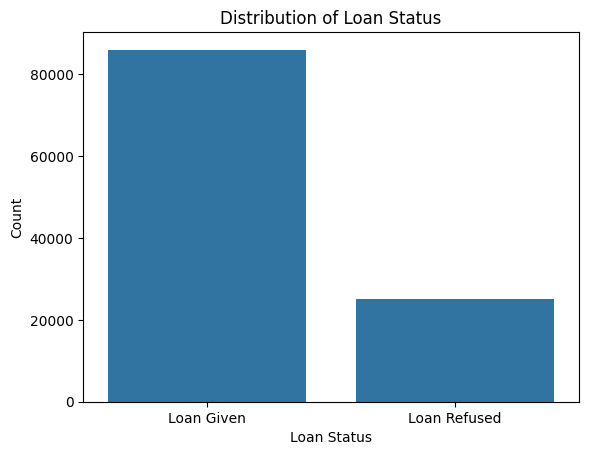

In [14]:
create_bar_chart(df,'loan_status')

According to the bar chart, there is a class imbalance in the loan status column where there are significantly more loan given compared to loan refused.

Next, I'll create a histogram of the current loan amount column to understand the data distribution.

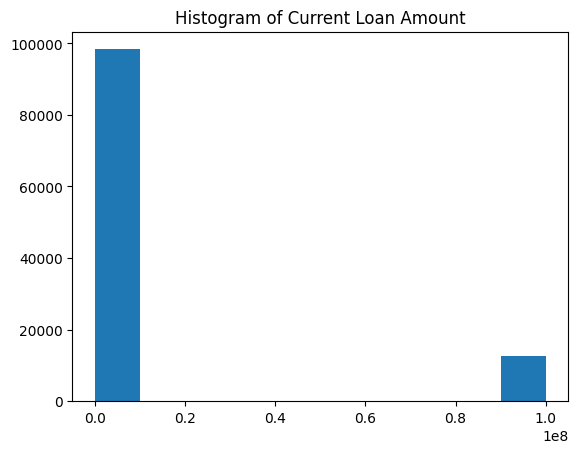

In [15]:
create_histogram(df,'current_loan_amount')

In [16]:
df[df.current_loan_amount == df.current_loan_amount.max()].head()

,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
5042,bac918fa-35e0-40a2-af65-58b456a742e7,c96da120-30d2-4acd-9740-e4d280f4bfcb,Loan Given,99999999,Short Term,739.0,3 years,Home Mortgage,60012.0,Home Improvements,1295.26,16.6,33.0,16,0,427,8542,0.0,0.0
5043,bb983383-0aa0-4d13-9b7f-05f694672374,d602647a-0820-4025-b93d-9f962f958acf,Loan Given,99999999,Short Term,704.0,9 years,Rent,54802.0,Debt Consolidation,1114.31,16.9,30.0,12,0,4716,5822,0.0,0.0
5044,0c7fcf5e-ec4a-46d5-8175-15c846df7c74,a709e893-b6b6-49ed-b775-bdef1155c78d,Loan Given,99999999,Short Term,751.0,5 years,Rent,35693.0,Debt Consolidation,626.12,11.0,NaN,7,0,742,9166,0.0,0.0
5045,878c4189-bd53-4836-a16d-203519034758,64fa8876-80fa-4a69-b16b-144a8ecfb14a,Loan Given,99999999,Short Term,735.0,NaN,Home Mortgage,33884.0,Debt Consolidation,683.34,18.9,10.0,12,0,10835,18028,0.0,0.0
5046,193ac878-4d50-4be0-995b-20896ebc9ad8,02a4bc6d-db02-406b-9bf6-8e0dd42782eb,Loan Given,99999999,Short Term,745.0,3 years,Own Home,103343.0,Debt Consolidation,1300.41,14.1,NaN,14,0,22746,42835,0.0,0.0


In [17]:
mean_extreme_values = df[df.current_loan_amount == df.current_loan_amount.max()].current_loan_amount.mean()
print(f"The average of the extreme values found in the dataframe is {mean_extreme_values}")

The average of the extreme values found in the dataframe is 99999999.0


The values off all the extreme values are 99999999.0. This indicates that there are errors in inputting the data. I will need to deal with this later.

Next, I will create the bar chart of the loan term.

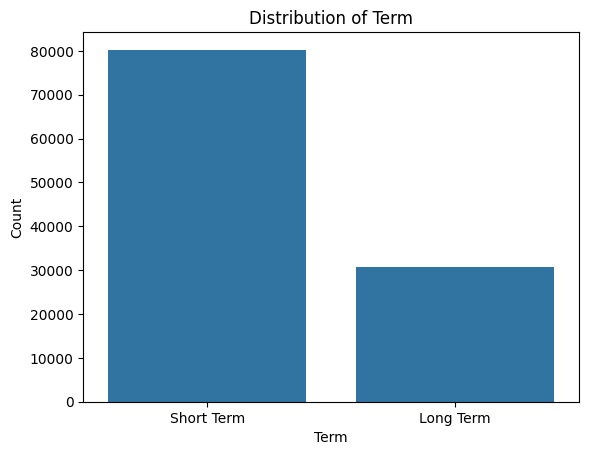

In [18]:
create_bar_chart(df,'term')

Again, there is a class imbalance problem here. But as this is a feature, I will later do a one-hot-encode for this column.

Next, onto the credit score histogram.

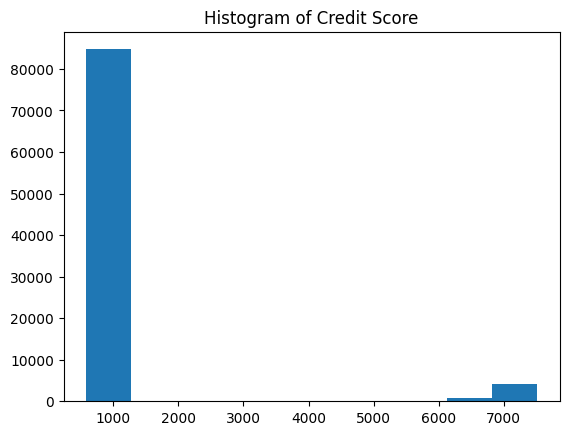

In [19]:
create_histogram(df,'credit_score')

As we can see, there are values that exceed the maximum credit score according to FICO (850). Although there is another method of scoring credit which goes up to 900, I will use FICO as the most common one. I will take a look at the data description where the credit score exceeds 850.

In [20]:
df[df.credit_score>850].credit_score.describe()

count    5042.000000
mean     7109.071797
std       306.060537
min      5850.000000
25%      6950.000000
50%      7190.000000
75%      7350.000000
max      7510.000000
Name: credit_score, dtype: float64

The minimum value is 5850 and the maximum value is 7510. Again, this has to be beacuse of errors in inputting the data. I will divide this score by 10, assuming that the errors happened because of inputting an extra 0 in each row.

Next, I will take a look at the distribution of years in current job.

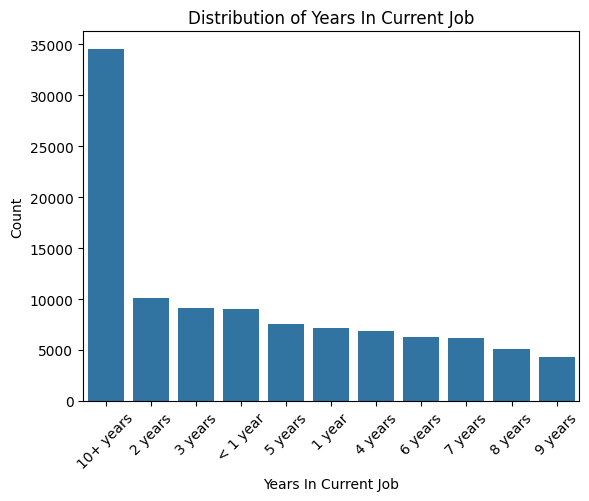

In [21]:
create_bar_chart(df,'years_in_current_job', rotation=45)

Most of the people applying for loan have work 10+ years in their respective companies. The data type is string, because there are special characters and the word 'year(s)'. I will map this into numbers, but treat it as categorical data. 

Next, I will look at the distribution of home ownership.

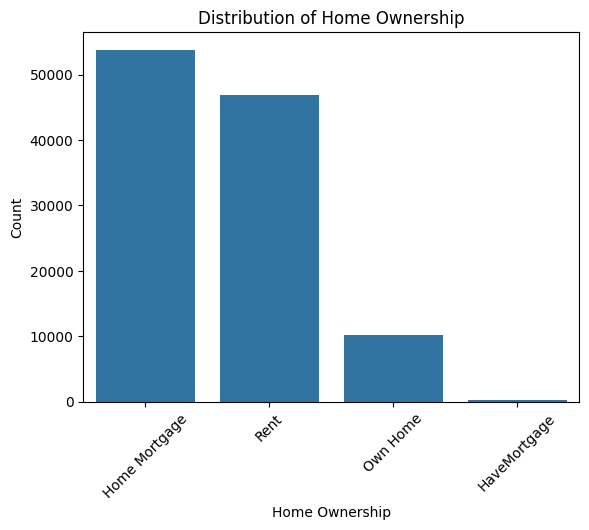

In [22]:
create_bar_chart(df,'home_ownership', rotation=45)

I think the values "Home Mortgage" and "HaveMortgage" is the same. I will have to change it accordingly in the data cleaning phase.

Next, I will examine the distribution of annual income.

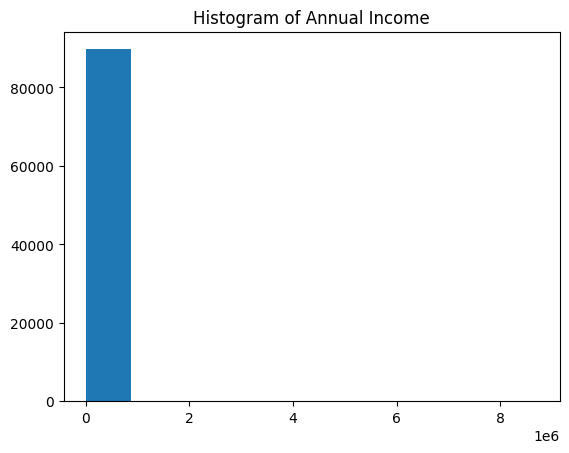

In [23]:
create_histogram(df,'annual_income')

There seems to be extreme values in the data. I will check whether it's an error or not.

In [24]:
df[df.annual_income == df.annual_income.max()]

,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
3669,6dfd2f9c-b796-4cb3-8f71-04d6ae8a8f92,ceee183a-9b02-4b82-ae53-14ccd5f785fd,Loan Refused,8006,Short Term,7250.0,10+ years,Home Mortgage,8713547.0,Debt Consolidation,798.74,16.0,NaN,11,0,16462,30429,0.0,0.0


I'm not really sure whether this is an error or not. I would say it's possible for someone to have an annual income of USD 8M+ (assuming that the annual income is in USD). And since the purpose of the loan is debt consolidation, it's probable that this person uses debt to finance the business. Therefore, I will not change it and assume that this data is correct.

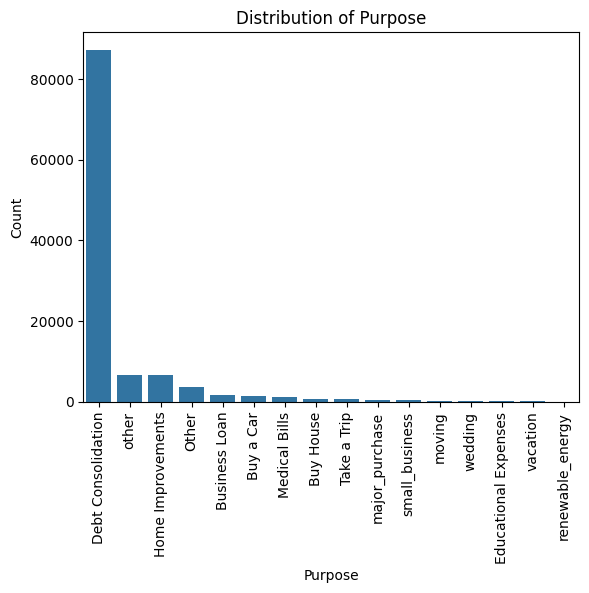

In [25]:
create_bar_chart(df,'purpose', rotation=90)

The majority of people applied for loans with the purpose of debt consolidation. One thing to note here, the data is written using 2 styles: Title and Snake Case. I will convert all the values in columns with string values into snake case (all lowercase), especially for the ones I need to do one-hot-encoding. Looking closely, if I let the values to be as they are, there will be problem such as "other" and "Other" being treated differently while it's obviously the same.

Before moving on the the monthly_debt, I need to check why the column has object values instead of float (as I mentioned before).

In [26]:
data_list = df.monthly_debt.tolist()
data_list_numeric = pd.to_numeric(data_list, errors='coerce')
non_numeric_indices = [index for index, item in enumerate(data_list_numeric) if pd.isna(item)]
for idx in non_numeric_indices:
    print(data_list[idx])

$1051.41
$157.15
$944.7
$481.34
$1838.98
$471.6


Apparently, the monthly_debt column has a dollar symbol on some of the values. Before proceeding to build the histogram, I need to fix this and change the datatype into float.

In [27]:
data_float = []
for i in data_list:
    try:
        flt_data = float(i)
    except:
        flt_data = float(i.strip().replace('$',''))
    data_float.append(flt_data)

In [28]:
data_list_numeric = pd.to_numeric(data_float, errors='coerce')
non_numeric_indices = [index for index, item in enumerate(data_float) if pd.isna(item)]
print(f"There are {len(non_numeric_indices)} non-numeric data")

There are 0 non-numeric data


In [29]:
df['monthly_debt'] = data_float

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111105 entries, 0 to 111104
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   loan_id                       111105 non-null  object 
 1   customer_id                   111105 non-null  object 
 2   loan_status                   111105 non-null  object 
 3   current_loan_amount           111105 non-null  int64  
 4   term                          111105 non-null  object 
 5   credit_score                  89767 non-null   float64
 6   years_in_current_job          106412 non-null  object 
 7   home_ownership                111105 non-null  object 
 8   annual_income                 89767 non-null   float64
 9   purpose                       111105 non-null  object 
 10  monthly_debt                  111105 non-null  float64
 11  years_of_credit_history       111105 non-null  float64
 12  months_since_last_delinquent  52102 non-null

Now, the monthly_debt has the correct datatype. I will plot the histogram.

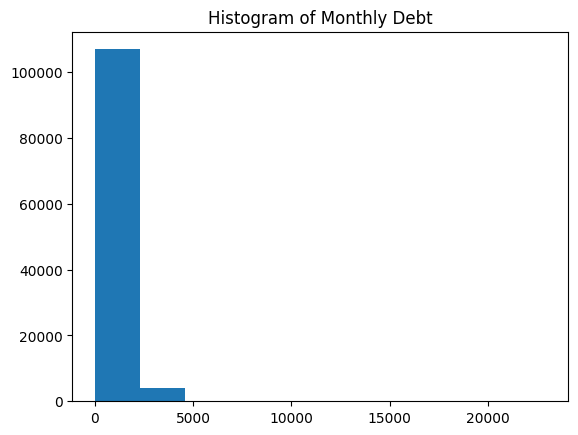

In [31]:
create_histogram(df,'monthly_debt')

There seems to be extreme values as well in this data. Let's check the data description of people with monthly debt larger than the 75% quantile.

In [32]:
df[df.monthly_debt > df.monthly_debt.describe()['75%']].monthly_debt.describe()

count    27775.000000
mean      1821.517244
std        625.113477
min       1262.720000
25%       1416.895000
50%       1636.520000
75%       2011.140000
max      22939.120000
Name: monthly_debt, dtype: float64

The extreme values are still present. Let's check whether it's still present if the monthly debt is larger than 10000.

In [33]:
df[df.monthly_debt >10000].monthly_debt

4010     10831.65
18580    12055.68
79752    22939.12
89940    12055.68
Name: monthly_debt, dtype: float64

Apparently, the extreme values are just present without errors. It's possible that some people have high monthly debt to be paid. Therefore, I won't do anything to this column as well.

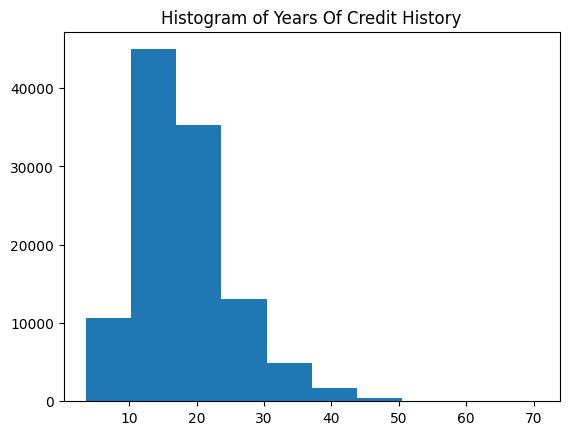

In [34]:
create_histogram(df,'years_of_credit_history')

The distribution is skewed to the right. The number of people with 10 to about 18 years in credit history is the most compared to the other bins.

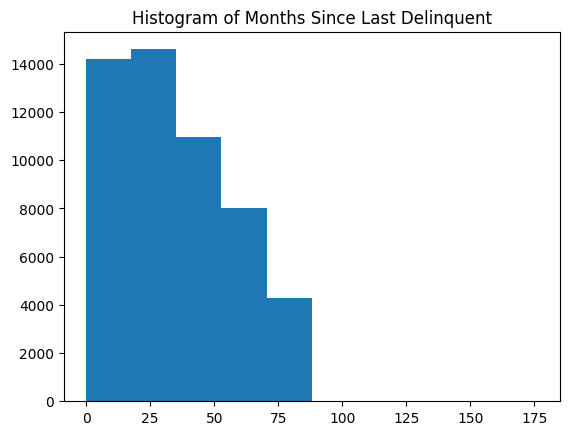

In [35]:
create_histogram(df,'months_since_last_delinquent')

In [36]:
df.months_since_last_delinquent.isnull().sum()/df.shape[0]

0.531056208091445

In [37]:
df[df.months_since_last_delinquent == df.months_since_last_delinquent.max()]

,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
83368,b7a27936-8fa8-4b9e-a35f-3a2b57ee725e,8480986e-847d-4523-9e04-21aff3713190,Loan Given,7928,Short Term,715.0,10+ years,Own Home,55193.0,Debt Consolidation,1044.06,23.8,176.0,13,0,19174,20978,0.0,0.0
107593,b7a27936-8fa8-4b9e-a35f-3a2b57ee725e,8480986e-847d-4523-9e04-21aff3713190,Loan Given,7928,Short Term,715.0,10+ years,Own Home,55193.0,Debt Consolidation,1044.06,23.8,176.0,13,0,19174,20978,0.0,0.0


Delinquency in loan refers to when someone is late in paying debt. Based on the histogram, there are extreme values as well. And the highest frequency is from about 23 to 27 months, followed by 0 to about 22 months. There are more than 53% missing data here.

When examining the extreme values, I found out that there are duplicates in the dataset. I will deal with it during the data cleaning phase.

Next, I will examine the number of open accounts.

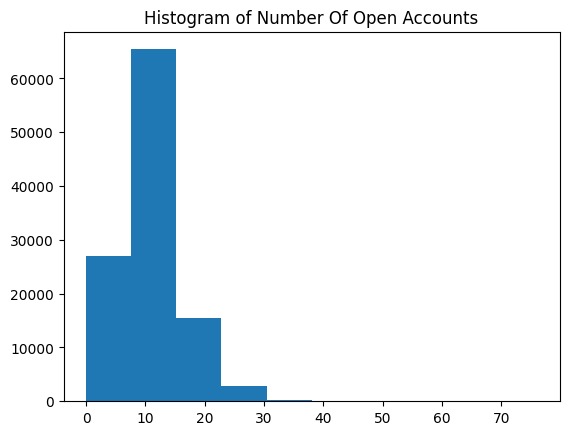

In [38]:
create_histogram(df,'number_of_open_accounts')

In [39]:
df[df.number_of_open_accounts == df.number_of_open_accounts.max()]

,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
2249,08dab131-9db3-4184-a32a-e12e48fd5d6c,907c2a89-76f8-4089-9a47-d410bb885339,Loan Refused,18755,Long Term,6700.0,7 years,Rent,46912.0,Debt Consolidation,1032.06,27.4,NaN,76,0,22111,28131,0.0,0.0
54290,f4e0a453-a5ec-4011-9513-9d203ffe8e3c,3e62a9e2-a61b-472d-8e56-234e30061580,Loan Refused,20426,Short Term,708.0,5 years,Home Mortgage,122556.0,Debt Consolidation,2195.80,15.7,NaN,76,0,40606,121575,0.0,0.0


The column account here is not clear. It can refer to the number of bank accounts or loan accounts opened. Most people have about 9 to 15 accounts opened. The distribution is also skewed to the right.

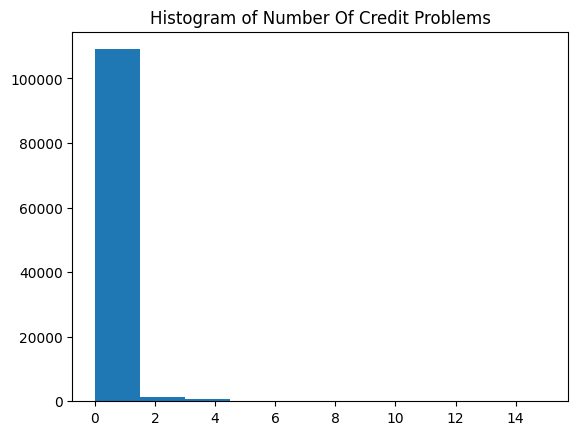

In [40]:
create_histogram(df, 'number_of_credit_problems')

Most people don't have problems in their credit. I will examine the relationship between this variable with loan status later.

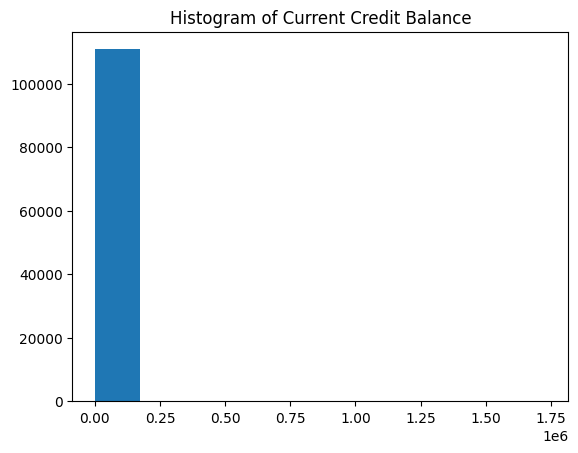

In [41]:
create_histogram(df, 'current_credit_balance')

Credit balance in loans often refers to whether a borrower overpaid their loans. Since there are no negative numbers, all of the people either paid the exact loan amount or overpaid their loans.

The maximum open credit column has object as datatype. It should be numeric. I will see what's wrong with this column.

In [42]:
data_list = df.maximum_open_credit.tolist()
data_list_numeric = pd.to_numeric(data_list, errors='coerce')
non_numeric_indices = [index for index, item in enumerate(data_list_numeric) if pd.isna(item)]
for idx in non_numeric_indices:
    print(data_list[idx])

#VALUE!
#VALUE!


In [43]:
df[df.maximum_open_credit == '#VALUE!']

,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
4928,e42ae1f7-74b5-46d7-95ce-46a88918ba12,a679ed55-963a-4de6-8be0-4364eb601b6f,Loan Refused,2052,Short Term,7030.0,10+ years,Rent,95105.0,Debt Consolidation,1910.02,22.4,37.0,9,0,0,#VALUE!,0.0,0.0
37355,b798f46b-e27b-4823-af83-294b1ffc3490,f61890c5-e264-4b0f-a047-9cfa03b9d182,Loan Refused,1470,Short Term,NaN,2 years,Rent,NaN,Debt Consolidation,506.34,15.3,26.0,3,0,0,#VALUE!,0.0,0.0


Clearly, there are errors in inputting the data. I will replace these with NaN values since I don't know what the actual values are.

In [44]:
df['maximum_open_credit'] = df.maximum_open_credit.replace('#VALUE!', np.nan, regex=True)
df['maximum_open_credit'] = df['maximum_open_credit'].astype('float')

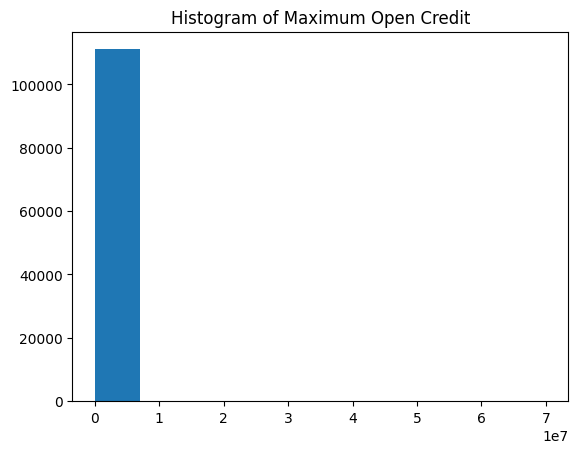

In [45]:
create_histogram(df,'maximum_open_credit')

Again, there are extreme values present. I will examine that.

In [46]:
df[df.maximum_open_credit == df.maximum_open_credit.max()]

,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
58914,f02dc06f-30f4-4b1d-ba58-156c2f3bd33d,a5c22bae-59c4-4a6c-8f04-628a4dadef57,Loan Given,34419,Long Term,729.0,< 1 year,Home Mortgage,172095.0,Debt Consolidation,2007.78,19.8,NaN,16,0,139976,69988086.0,0.0,0.0


In [47]:
df.maximum_open_credit.describe()

count    1.111030e+05
mean     3.438660e+04
std      3.643059e+05
min      0.000000e+00
25%      1.241700e+04
50%      2.124300e+04
75%      3.558400e+04
max      6.998809e+07
Name: maximum_open_credit, dtype: float64

In [48]:
df['maximum_open_credit'].quantile([0.5,0.75,0.95,0.99,1])

0.50       21243.00
0.75       35584.00
0.95       74538.70
0.99      164623.96
1.00    69988086.00
Name: maximum_open_credit, dtype: float64

There is only one extreme value, and the gap between the 99th quantile and the 100th quantile is huge. I would assume that this is an error in inputting the data. I will change the highest number to NaN for now.

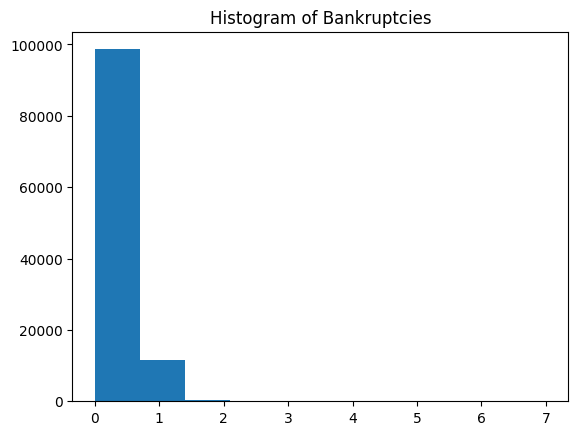

In [49]:
create_histogram(df, 'bankruptcies')

In [50]:
df.bankruptcies.value_counts()

bankruptcies
0.0    98648
1.0    11613
2.0      468
3.0      110
4.0       27
5.0        8
6.0        2
7.0        1
Name: count, dtype: int64

The number of people who declared bankruptcies for more than 1 times is extremely low, which is logical. Most haven't declared bankruptcies or at most 1 time.

Next, onto tax liens. A tax lien is some sort of a legal claim by government to people who have tax debt.

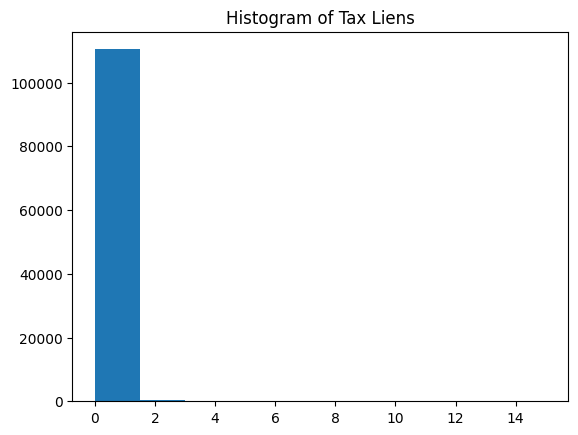

In [51]:
create_histogram(df, 'tax_liens')

Again, most people has 0-1 tax liens indicating that they don't have tax debt.

The single variable analysis is finished. The takeaways from the EDA is:

1. Examining duplicated data
2. Dealing with the extreme values in the current_loan_amount column
3. Fix the values in the credit_score which are more than 850
4. Map the values in the years_in_current_job column to numbers, but change the type into categorical
5. Change the value HaveMortage to Home Mortgage in the home_ownership column
6. Convert all the string values in all of the column into snake case, all lowercase.
7. Change the extreme value in the maximum_open_credit column into NaN value, and impute it later
8. Impute the missing values in the rest of the columns

I will save the data to a csv file first to avoid out of memory problem. In the next notebook, I will continue with the relationship between the predictors and target (loan_status) variable.

In [56]:
df.to_csv(r'D:\LoanLens\data\after_single_var_eda.csv', index=False)
